# Simulating and estimating a GARCH model

In [5]:
library(timeDate) 
library(timeSeries) 
library(fBasics) 
library(fGarch)
library(repr)

options(repr.plot.width=8, repr.plot.height=2.5)

## Simulating data

In [19]:
# Let us first simulate a GARCH(1,1) with known parameters and then estimate it subsequently. 
alpha0 <- 0.0000001
alpha1 <- c(0.2)
beta1  <- c(0.6)
model  <- garchSpec(list(omega=alpha0, alpha=alpha1, beta=beta1)) # specify parameters for GARCH model
y      <- garchSim(model,n=5000)
head(y)

GMT
                   garch
2005-03-07 -0.0003351965
2005-03-08  0.0001327567
2005-03-09  0.0011573058
2005-03-10 -0.0006919915
2005-03-11 -0.0012380017
2005-03-12  0.0006942783

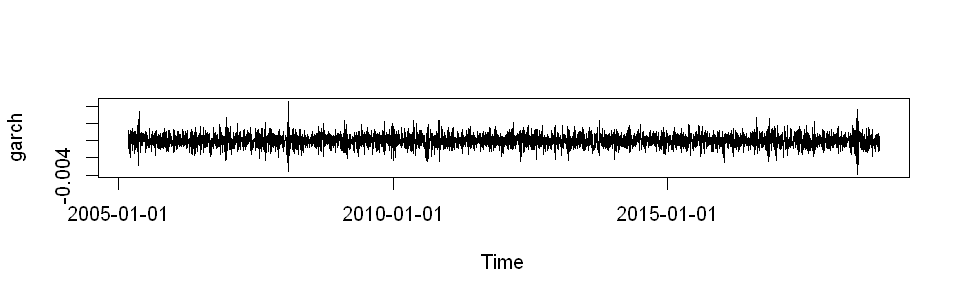

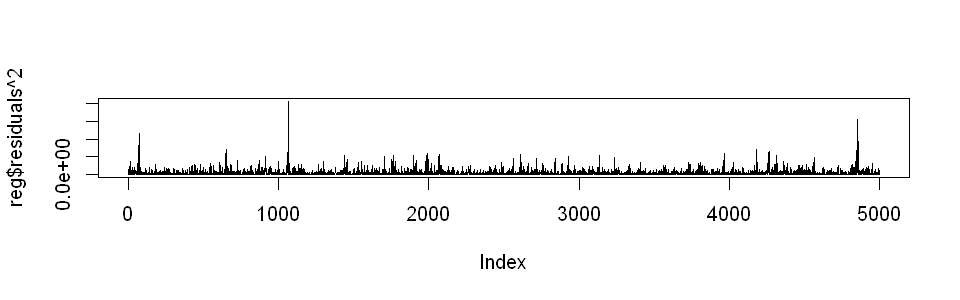

In [55]:
plot(y, type="l")
reg <- lm(y~1)
plot(reg$residuals^2, type="l")

## Fitting a GARCH model
As we could see there was problems with the squared residuals, they weren't so nice behaving, so we fit a GARCH(1,1) model

In [49]:
fit <-garchFit(formula = ~arma(0, 0) + garch(1, 1), y, include.mean = F, trace = F)

# try fitting GARCH model to simulated timeseries
summary(fit)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(0, 0) + garch(1, 1), data = y, include.mean = F, 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(1, 1)
<environment: 0x0000000008c6ee68>
 [data = y]

Conditional Distribution:
 norm 

Coefficient(s):
     omega      alpha1       beta1  
9.5384e-08  2.1753e-01  5.8957e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega  9.538e-08   1.177e-08    8.105 4.44e-16 ***
alpha1 2.175e-01   1.921e-02   11.324  < 2e-16 ***
beta1  5.896e-01   3.521e-02   16.743  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 29443.54    normalized:  5.888707 

Description:
 Wed Nov 14 11:36:56 2018 by user: larsn 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  3.55289   0.1692387
 Shapiro-Wilk Test  R    W      NA        NA       
 Ljung-Box Test     R   

In [50]:
#coef(fit)
#fit@fit$ics
#fit@fit$se.coef
#fit@fit$tval

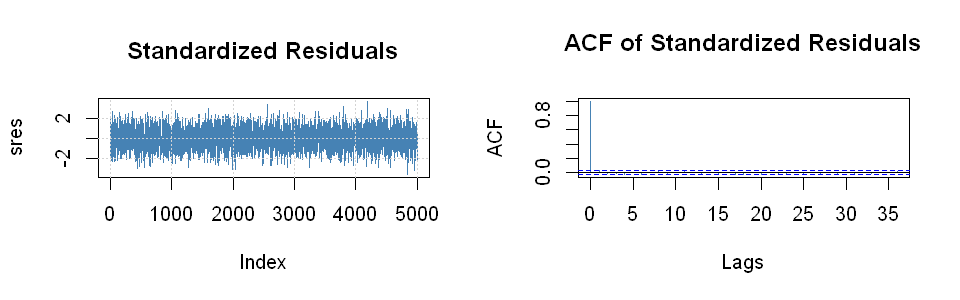

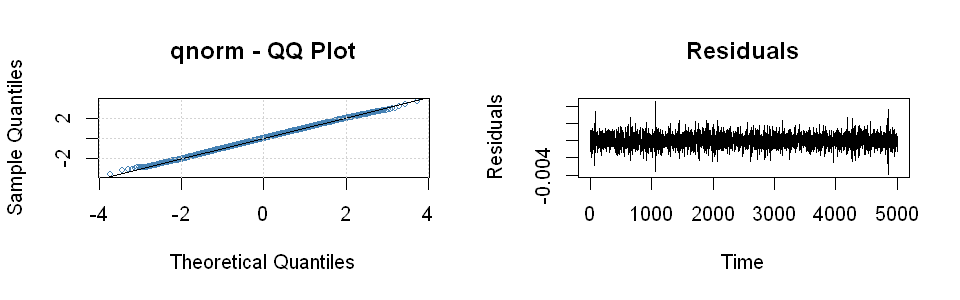

In [22]:
par(mfrow=c(1,2)) 
plot(fit, which=c(9,10))
par(mfrow=c(1,2)) 
plot(fit, which=c(13))
plot(fit@residuals, type="h", xlab="Time", ylab="Residuals", main="Residuals")

## Results
As we can see it estimates the parametres almost as the simulated data, now the standardized residuals should be checked for autocorrelation, so we go through how to calculate them yourself and also seeing the fit of the simulated h series

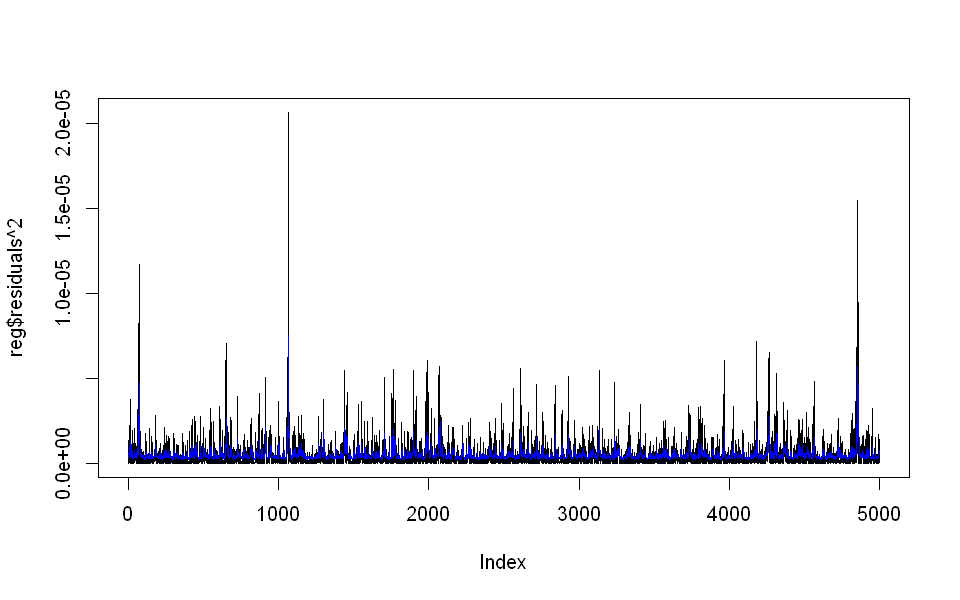

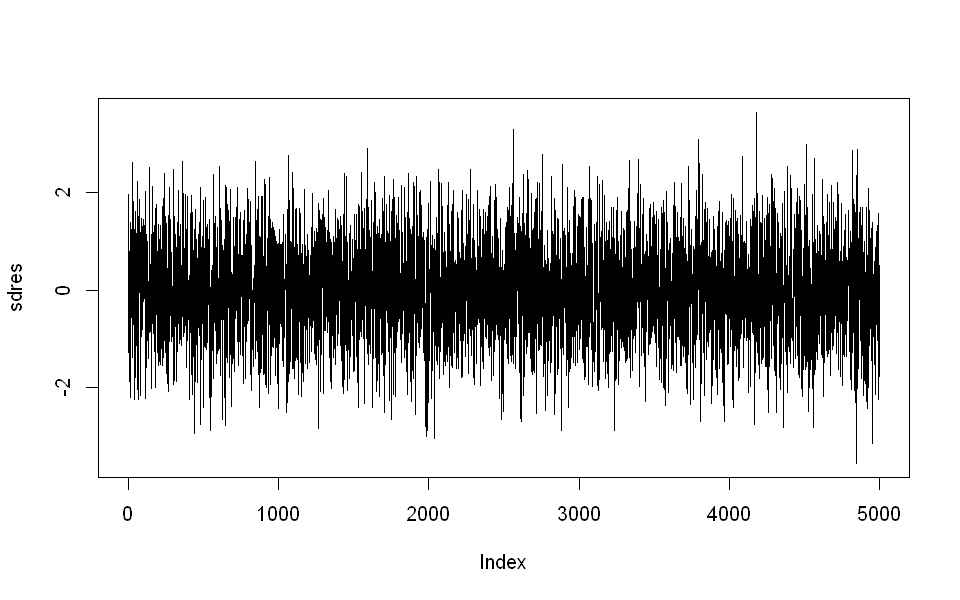

In [59]:
options(repr.plot.width=8, repr.plot.height=5)

plot(reg$residuals^2, type="l")
lines(fit@h.t, type="l", col="blue")

sdres <- fit@residuals / sqrt(fit@h.t)
plot(sdres, type="l")

## You can also simulate the $h_t$
if you know the parametres, asa you can see the two h series are similar

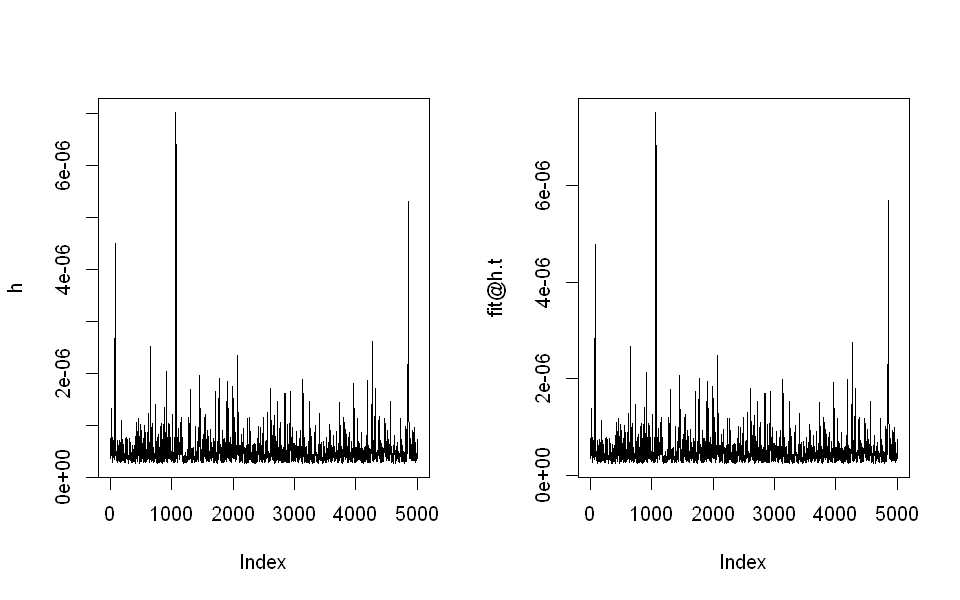

In [67]:
a <- 0.2
b <- 0.6
w <- 0.0000001

u <- reg$coef
h <- c(var(reg$residuals))

for (i in 2:5000) {
    h[i] <- w + a*(y[i-1] - u)^2 + (b * h[i-1])
}

par(mfrow=c(1,2))
plot(h, type="l")
plot(fit@h.t, type="l")


In [60]:
reg$coef

(Intercept) 
1.271039e-06

In [71]:
head(y)
head(reg$residuals)

GMT
                   garch
2005-03-07 -0.0003351965
2005-03-08  0.0001327567
2005-03-09  0.0011573058
2005-03-10 -0.0006919915
2005-03-11 -0.0012380017
2005-03-12  0.0006942783

2005-03-07    2005-03-08    2005-03-09    2005-03-10    2005-03-11 
-0.0003364675  0.0001314857  0.0011560347 -0.0006932626 -0.0012392727 
   2005-03-12 
 0.0006930073

In [75]:
mean(y)
mean(reg$residuals)

[1] 1.271039e-06

[1] 3.897389e-21